In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
import json
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 100)

In [4]:
sb = None
with open('../soccer_analytics_dpme/data/3795220.json') as f:
    js = json.load(f)
    sb = pd.json_normalize(js)

In [5]:
teams = ['Italy', 'Spain']

In [6]:
sb['pass.type.name'].unique()

array([nan, 'Kick Off', 'Throw-in', 'Recovery', 'Free Kick',
       'Interception', 'Goal Kick', 'Corner'], dtype=object)

In [7]:
location = np.array(sb.location.apply(lambda x: x[:2] if type(x)==list else [np.nan, np.nan]).to_list())
passEndLocation = np.array(sb['pass.end_location'].apply(lambda x: x[:2] if type(x)==list else [np.nan, np.nan]).to_list())
sb[['location.x', 'location.y']] = location
sb[['pass.end_location.x', 'pass.end_location.y']] = passEndLocation

In [8]:
sns.set_theme(palette='pastel')

In [9]:
def plot_set_pieces(type_name: str, team_name: str, norm_x=False, norm_y=False, pitch_type=VerticalPitch, half=False, color='tab:blue', save=False):
    type = sb[sb['pass.type.name']==type_name]
    type_team = type[type['team.name']==team_name]
    pitch = pitch_type(pitch_type='statsbomb', pitch_color='#303030', half=half)
    fig, ax = pitch.draw(figsize=(7,7))
    ax.set_title(f'Plotting {type_name}s for {team_name}')
    
    offX = np.full(type_team.shape[0], 60.)
    offY = np.full(type_team.shape[0], 40.)
    zero = np.full(type_team.shape[0], 0.)
    startX = offX if norm_x else type_team['location.x']
    startY = offY if norm_y else type_team['location.y']
    endX = type_team['pass.end_location.x'] - (type_team['location.x']-offX if norm_x else zero)
    endY = type_team['pass.end_location.y'] - (type_team['location.y']-offY if norm_y else zero)
    pitch.lines(startX, startY, endX, endY, ax=ax, comet=True, color=color, lw=3)
    
    if pitch_type==Pitch:
        plt.scatter(endX, endY, color='#303030', edgecolor=color, s=20, linewidths=2, zorder=10)
    else:
        plt.scatter(endY, endX, color='#303030', edgecolor=color, s=20, linewidths=2, zorder=10)
    
    if save:
        name_norm = team_name.lower().replace(' ', '_')
        type_norm = type_name.lower().replace(' ', '_')
        plt.savefig(f'../results/plot_{ type_norm }_{ name_norm }')
    plt.show()

# Throw-Ins

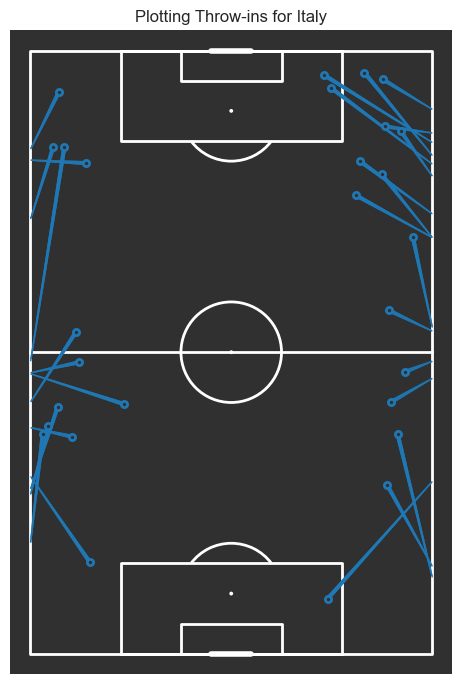

In [11]:
plot_set_pieces('Throw-in', 'Italy', color='tab:blue')

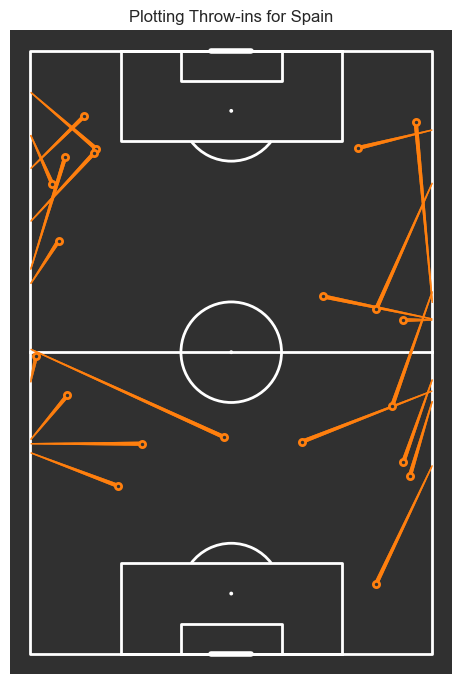

In [12]:
plot_set_pieces('Throw-in', 'Spain', color='tab:orange')

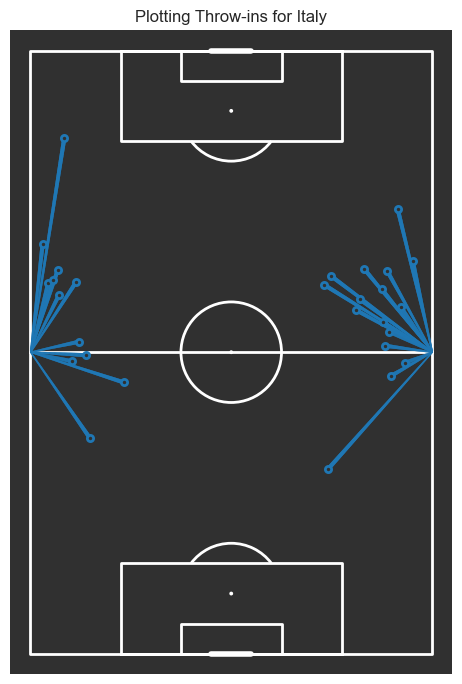

In [15]:
plot_set_pieces('Throw-in', 'Italy', norm_x=True, color='tab:blue', save=True)

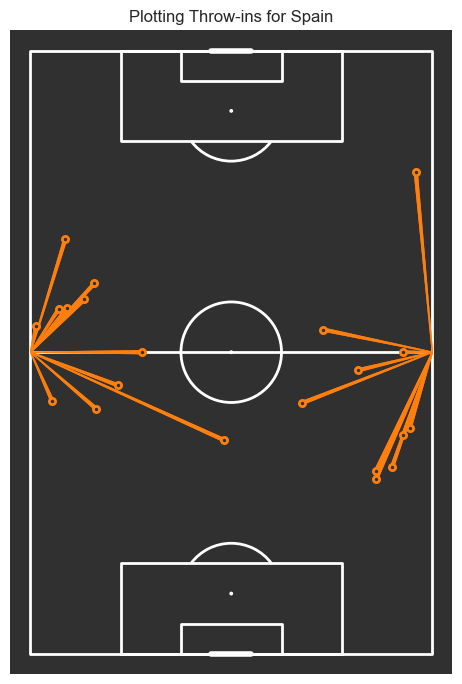

In [16]:
plot_set_pieces('Throw-in', 'Spain', norm_x=True, color='tab:orange', save=True)

# Free kicks

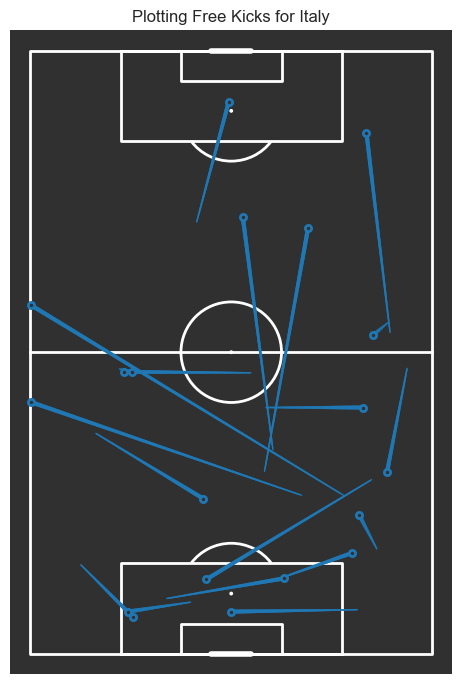

In [17]:
plot_set_pieces('Free Kick', 'Italy', color='tab:blue')

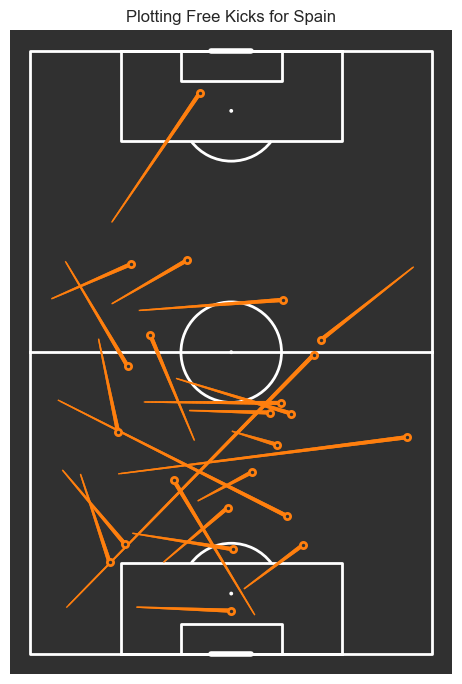

In [18]:
plot_set_pieces('Free Kick', 'Spain', color='tab:orange')

# Corner

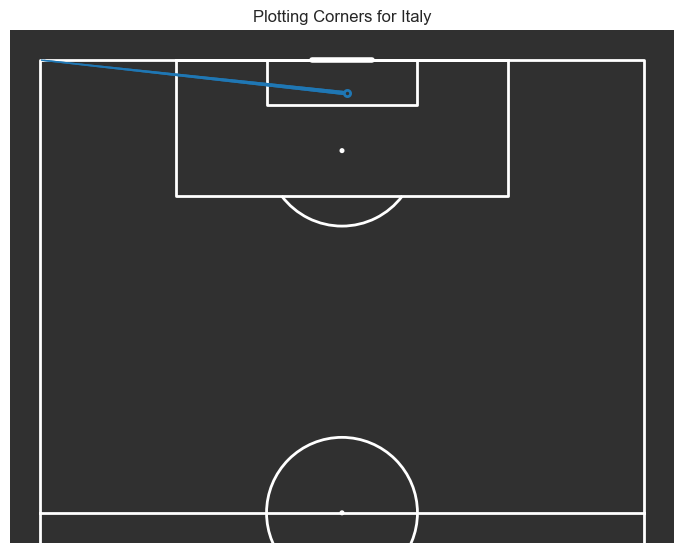

In [19]:
plot_set_pieces('Corner', 'Italy', half=True, color='tab:blue')

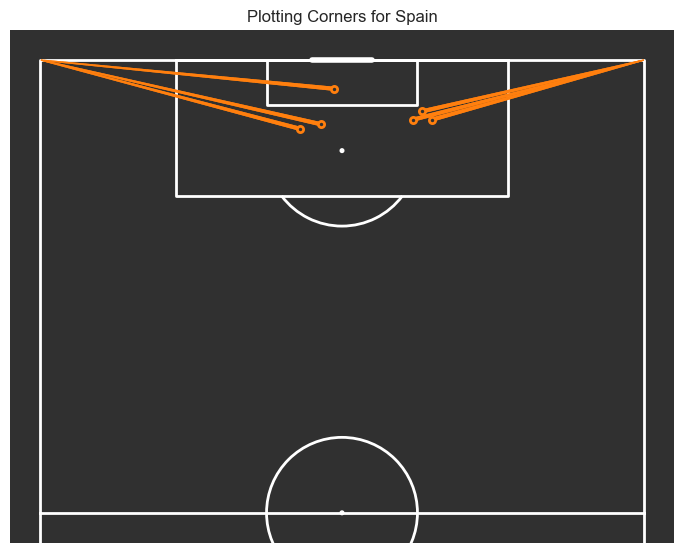

In [20]:
plot_set_pieces('Corner', 'Spain', half=True, color='tab:orange')

# Goal Kicks

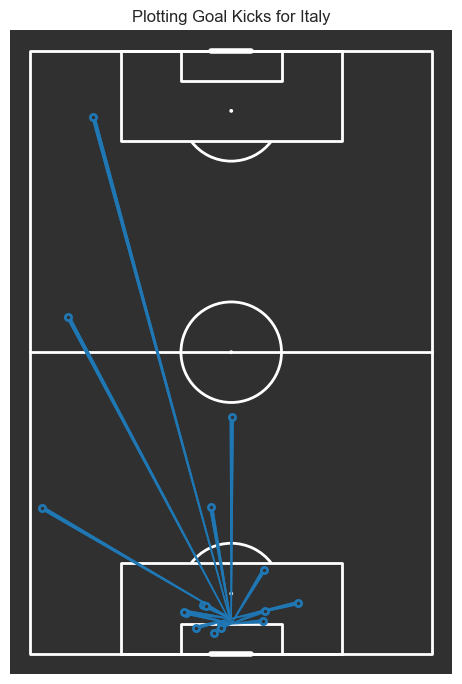

In [21]:
plot_set_pieces('Goal Kick', 'Italy', norm_y=True, color='tab:blue', save=True)

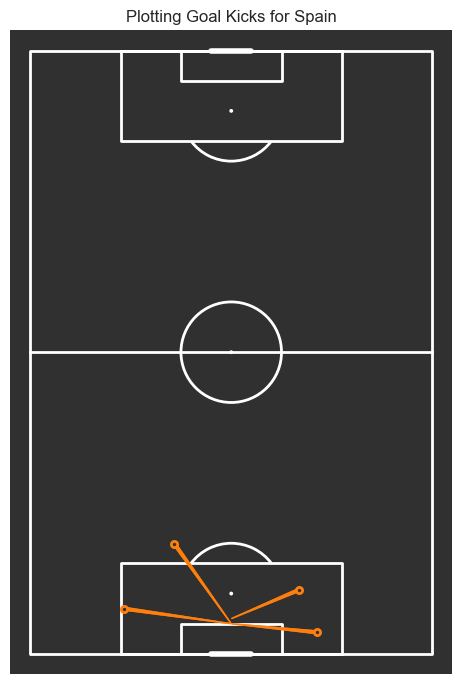

In [22]:
plot_set_pieces('Goal Kick', 'Spain', norm_y=True, color='tab:orange', save=True)